In [15]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dga_domains.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133926 entries, 0 to 133925
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   host      133926 non-null  object
 1   domain    133926 non-null  object
 2   class     133926 non-null  object
 3   subclass  133926 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB


In [16]:
df.head()

,host,domain,class,subclass
0,000directory.com.ar,000directory,legit,legit
1,000webhost.com,000webhost,legit,legit
2,001fans.com,001fans,legit,legit
3,01-telecharger.com,01-telecharger,legit,legit
4,010shangpu.com,010shangpu,legit,legit


In [17]:
df2 = pd.read_csv('random_entries_df.csv')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Domain  200000 non-null  object
 1   Class   200000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [19]:
!pip install tldextract

In [20]:
df2

,Domain,Class
0,organicaglobal.co.ls,legit
1,ruralnet.com.ar,legit
2,snickers.com,legit
3,agaauto.ro,legit
4,remax.it,legit
...,...,...
199995,rubbergroup.vn,legit
199996,speechoawics.xyz,DGA
199997,kehbf7.com,legit
199998,clinica25demayo.com.ar,legit


In [21]:
df.drop(['domain', 'subclass'], axis=1, inplace=True)

In [22]:
df

,host,class
0,000directory.com.ar,legit
1,000webhost.com,legit
2,001fans.com,legit
3,01-telecharger.com,legit
4,010shangpu.com,legit
...,...,...
133921,zzsearch.net,legit
133922,zzstream.li,legit
133923,zzu1icncjioj5i9gjr18vjr6c.org,dga
133924,zzxsmfnvijtdxnvxytowkx.ru,dga


In [23]:
df.rename(columns={'host': 'Domain', 'class': 'Class'}, inplace=True)

In [24]:
df

,Domain,Class
0,000directory.com.ar,legit
1,000webhost.com,legit
2,001fans.com,legit
3,01-telecharger.com,legit
4,010shangpu.com,legit
...,...,...
133921,zzsearch.net,legit
133922,zzstream.li,legit
133923,zzu1icncjioj5i9gjr18vjr6c.org,dga
133924,zzxsmfnvijtdxnvxytowkx.ru,dga


In [25]:
df_final = pd.concat([df, df2], ignore_index=True)

In [26]:
df_final

,Domain,Class
0,000directory.com.ar,legit
1,000webhost.com,legit
2,001fans.com,legit
3,01-telecharger.com,legit
4,010shangpu.com,legit
...,...,...
333921,rubbergroup.vn,legit
333922,speechoawics.xyz,DGA
333923,kehbf7.com,legit
333924,clinica25demayo.com.ar,legit


In [27]:
additional_dga_domains_file = "some_more_dga.txt"
with open(additional_dga_domains_file, "r") as file:
    additional_dga_domains = [line.strip() for line in file]

# Create a DataFrame from the additional DGA domains
additional_dga_df = pd.DataFrame({'Domain': additional_dga_domains, 'Class': 'DGA'})

# Append the additional DGA domains to df_final
df_final = df_final.append(additional_dga_df, ignore_index=True)

<ipython-input-27-167be9a4b594>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(additional_dga_df, ignore_index=True)


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335605 entries, 0 to 335604
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Domain  335605 non-null  object
 1   Class   335605 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [29]:
import tldextract
import hashlib
import ssl
import socket


def extract_features(domain):
    features = {}

    # Extract domain components using tldextract
    ext = tldextract.extract(domain)
    sld = ext.domain
    tld = ext.suffix
    features['SLD_Length'] = len(sld)
    features['TLD_Length'] = len(tld)
    features['Symbol_Ratio'] = sum(1 for char in domain if not char.isalnum()) / len(domain)
    features['TLD_Hash'] = int(hashlib.md5(tld.encode()).hexdigest(), 16)
    features['TLD_Unique_Chars_Length'] = len(set(tld))
    features['Num_Digits_SLD'] = sum(char.isdigit() for char in sld)
    vowels = set('aeiouAEIOU')
    cons_consecutive = sum(1 for i in range(len(domain)-1) if domain[i].isalpha() and domain[i+1].isalpha() and domain[i] not in vowels and domain[i+1] not in vowels)
    features['Consecutive_Cons_Ratio'] = cons_consecutive / (len(domain) - sld.count('.') - 1)
    hex_chars = set('abcdefABCDEF0123456789')
    features['Hex_Ratio'] = sum(1 for char in domain if char in hex_chars) / len(domain)


    return features

In [30]:
from tqdm import tqdm
feature_list = []

for idx, row in tqdm(enumerate(df_final.itertuples()), total=len(df_final), desc='Extracting features'):
    features = extract_features(row.Domain)
    features['Class'] = 1 if row.Class.lower() == 'dga' else 0  # Append the class from random_entries_df.csv
    feature_list.append(features)

# Create a DataFrame from the extracted features
preprocessed_df = pd.DataFrame(feature_list)

# Save the preprocessed DataFrame to 'preprocessed.csv'
output_csv_path = 'preprocessed.csv'
preprocessed_df.to_csv(output_csv_path, index=False)

print(f'Preprocessed data saved to {output_csv_path}')

Extracting features: 100%|██████████| 335605/335605 [00:13<00:00, 24483.95it/s]


Preprocessed data saved to preprocessed.csv


In [31]:
ii = pd.read_csv('preprocessed.csv')

In [32]:
ii.iloc[0]

SLD_Length                                                      12
TLD_Length                                                       6
Symbol_Ratio                                              0.105263
TLD_Hash                   147587999562294931934830680385922983319
TLD_Unique_Chars_Length                                          6
Num_Digits_SLD                                                   3
Consecutive_Cons_Ratio                                    0.111111
Hex_Ratio                                                 0.421053
Class                                                            0
Name: 0, dtype: object

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have the feature DataFrame from 'random_entries_df.csv'
df = pd.read_csv('preprocessed.csv')  # Replace with your actual file path

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Train and evaluate a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.4f}')

Random Forest Classifier Accuracy: 0.9138


In [35]:
# Train and evaluate an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f'AdaBoost Classifier Accuracy: {adaboost_accuracy:.4f}')

AdaBoost Classifier Accuracy: 0.8876


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Assuming X_train, X_test, y_train, y_test are defined

# Define a list of Decision Tree classifiers with different hyperparameters
classifiers = [
    DecisionTreeClassifier(max_depth=None, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    DecisionTreeClassifier(max_depth=10, random_state=42)
]

best_accuracy = 0.0
best_model = None

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Check if the current model has higher accuracy than the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

# Save the best model to a pickle file
if best_model is not None:
    with open('dga_dtc.pkl', 'wb') as model_file:
        pickle.dump(best_model, model_file)
    print(f"\nBest model saved to 'best_model.pkl' with accuracy: {best_accuracy:.4f}")
else:
    print("No model was found with higher accuracy.")



Classifier: DecisionTreeClassifier
Accuracy: 0.9118

Classifier: DecisionTreeClassifier
Accuracy: 0.8683

Classifier: DecisionTreeClassifier
Accuracy: 0.9053

Best model saved to 'best_model.pkl' with accuracy: 0.9118


In [37]:
import pickle

# Load the saved model from the pickle file
with open('dga_dtc.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# List of domains for prediction
domain_list = [
    "nozqlla.mx",
    "macromsdie.org",
    "whmmsapp.dk",
    "accra70e.pt",
    "jupblr.club",
    "elrops.ae",
    "flpc4r.ga",
    "redn2t.cl",
    "tra1atar.fr",
    "nytiked.eu",
    "acaz0naws.mx",
    "amazon.in",
    "amazon.com",
    "google.ag",
    "google.ro",
    "site24x7.com",
    "x.com",
    "twitter.com",
    "sih.gov.in",
    "isro.gov.in",
    "ysuvekiz.bazar",
    "papacricognitisipro.com",
    "whatsapp.com",
    "videtpubigiturtamnulli.com",
    "wixcaiktigew.com",
    "exazekem.bazar",
    "f93101caff39da0f3fe40601192ea2a545.com",
    "fjumtfnz.biz",
    "google.de",
    "google.pl",
    "appcenter.ms",
    "branch.io"
]

# Assuming you have a function extract_features defined
# Extract features for the domain list
features_list = [extract_features(domain) for domain in domain_list]

# Assuming X_test is the feature matrix used during training
# Convert the features list to a feature matrix
X_pred = pd.DataFrame(features_list)  # You may need to adjust this based on your feature extraction method

# Make predictions using the loaded model
predictions = best_model.predict(X_pred)

# Print the predictions
for domain, prediction in zip(domain_list, predictions):
    print(f"Domain: {domain} - Predicted Class: {prediction}")


Domain: nozqlla.mx - Predicted Class: 1
Domain: macromsdie.org - Predicted Class: 0
Domain: whmmsapp.dk - Predicted Class: 1
Domain: accra70e.pt - Predicted Class: 0
Domain: jupblr.club - Predicted Class: 1
Domain: elrops.ae - Predicted Class: 1
Domain: flpc4r.ga - Predicted Class: 1
Domain: redn2t.cl - Predicted Class: 1
Domain: tra1atar.fr - Predicted Class: 1
Domain: nytiked.eu - Predicted Class: 0
Domain: acaz0naws.mx - Predicted Class: 1
Domain: amazon.in - Predicted Class: 0
Domain: amazon.com - Predicted Class: 0
Domain: google.ag - Predicted Class: 1
Domain: google.ro - Predicted Class: 0
Domain: site24x7.com - Predicted Class: 0
Domain: x.com - Predicted Class: 0
Domain: twitter.com - Predicted Class: 0
Domain: sih.gov.in - Predicted Class: 0
Domain: isro.gov.in - Predicted Class: 0
Domain: ysuvekiz.bazar - Predicted Class: 1
Domain: papacricognitisipro.com - Predicted Class: 0
Domain: whatsapp.com - Predicted Class: 0
Domain: videtpubigiturtamnulli.com - Predicted Class: 0
Do


Feature Importance:
[0.03841116 0.03329934 0.20830074 0.16079996 0.34005311 0.11112227
 0.0615281  0.04648532]


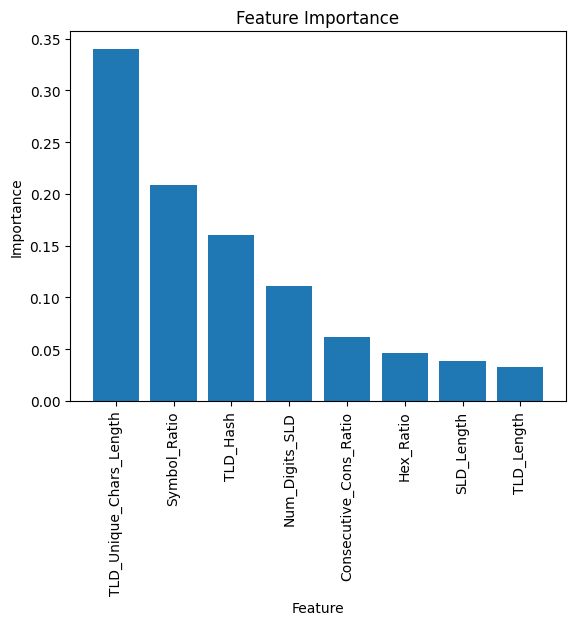

In [38]:
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined

# ... (Your existing code for training Decision Tree classifiers)

# Plot feature importance
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]

    plt.bar(range(len(feature_names)), feature_importance[sorted_idx], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importance")
    plt.show()

# Assuming best_model is the best Decision Tree classifier trained
if best_model is not None:
    # Print feature importance
    feature_names = list(X_train.columns)  # Assuming you have column names in X_train
    print(f"\nFeature Importance:\n{best_model.feature_importances_}")

    # Plot feature importance
    plot_feature_importance(best_model, feature_names)
else:
    print("No model was found with higher accuracy.")


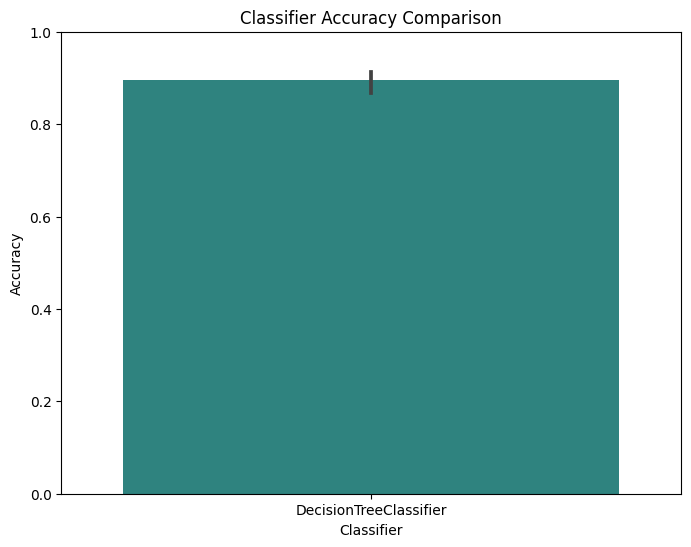

In [39]:
import seaborn as sns
classifiers_names = [clf.__class__.__name__ for clf in classifiers]
accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers]

plt.figure(figsize=(8, 6))
sns.barplot(x=classifiers_names, y=accuracies, palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

In [40]:
import pandas as pd

# Read domains from some_more_dga.txt
with open('some_more_dga.txt', 'r') as file:
    domain_list = [line.strip() for line in file]

# Extract features for the domain list
features_list = [extract_features(domain) for domain in domain_list]

# Convert the features list to a feature matrix
X_pred = pd.DataFrame(features_list)  # You may need to adjust this based on your feature extraction method

# Make predictions using the loaded model
predictions = best_model.predict(X_pred)

# Print the predictions and count the occurrences of 1 and 0
counter = {'Class 0': 0, 'Class 1': 0}

for domain, prediction in zip(domain_list, predictions):
    print(f"Domain: {domain} - Predicted Class: {prediction}")
    counter[f'Class {prediction}'] += 1

# Print the count of predictions
print("\nPrediction Count:")
for class_label, count in counter.items():
    print(f"{class_label}: {count}")


Domain: earnestnessbiophysicalohax.com - Predicted Class: 1
Domain: kwtoestnessbiophysicalohax.com - Predicted Class: 1
Domain: rvcxestnessbiophysicalohax.com - Predicted Class: 1
Domain: hjbtestnessbiophysicalohax.com - Predicted Class: 1
Domain: txmoestnessbiophysicalohax.com - Predicted Class: 1
Domain: agekestnessbiophysicalohax.com - Predicted Class: 0
Domain: dbzwestnessbiophysicalohax.com - Predicted Class: 1
Domain: sgjxestnessbiophysicalohax.com - Predicted Class: 1
Domain: igjyestnessbiophysicalohax.com - Predicted Class: 1
Domain: zxahestnessbiophysicalohax.com - Predicted Class: 0
Domain: ffaoestnessbiophysicalohax.com - Predicted Class: 0
Domain: miemestnessbiophysicalohax.com - Predicted Class: 0
Domain: rtneestnessbiophysicalohax.com - Predicted Class: 0
Domain: omtvestnessbiophysicalohax.com - Predicted Class: 1
Domain: cmngestnessbiophysicalohax.com - Predicted Class: 1
Domain: blgjestnessbiophysicalohax.com - Predicted Class: 1
Domain: dlbhestnessbiophysicalohax.com -

In [42]:
import json
with open('rows.json', 'r') as file:
    data = json.load(file)

# Extract features
domains = [row["row"]["domain"] for row in data["rows"]]
print(domains)



['vashikarana.net', 'vashikaranandblackmagicforlove.blogspot.in', 'vashikaranastrologerguru.com', 'vashikaranblackmagicindia.com', 'vashikarangod.com', 'vashikaranmantratotke.com', 'vashikaranonline.com', 'vashikaranpower.com', 'vashikaranprediction.com', 'vashikaranspecialist.com', 'vashikaranspecialist.net', 'vashikaranspecialistconsultant.wordpress.com', 'vashikaranspecialists.in', 'vashikaranspecialistsharmaji.com', 'vashikaranspellspecialist.com', 'vashinterestut.ru', 'vashinternetgid.ru', 'vashipitomcy.ru', 'vashishthakapoor.com', 'vashitimes.net', 'vashiva.com', 'vashivisuals.com', 'vashivolosi.ru', 'vashkofemem.ru', 'vashkontrol.ru', 'vashmagazin.ua', 'vashmatrass.ru', 'vashmeh.ru', 'vashmnenie.ru', 'vashnal.ru', 'vashnevrolog.ru', 'vashonbeachcomber.com', 'vashonsd.org', 'vashonstorefront.com', 'vashoot.com', 'vashopros.ru', 'vashoroskop.com', 'vashotel.ru', 'vashpozvonochnik.ru', 'vashpsixolog.ru', 'vashpult.ru', 'vashsad.ua', 'vashsport.com', 'vashstyle-nsk.ru', 'vashtehnik.

In [43]:
features_list = [extract_features(domain) for domain in domains]

# Convert the features list to a feature matrix
X_pred = pd.DataFrame(features_list)  # You may need to adjust this based on your feature extraction method

# Make predictions using the loaded model (replace 'best_model' with your actual model)
predictions = best_model.predict(X_pred)

# Print the predictions and count the occurrences of 0 and 1
counter = {'Class 0': 0, 'Class 1': 0}

for domain, prediction in zip(domains, predictions):
    print(f"Domain: {domain} - Predicted Class: {prediction}")
    counter[f'Class {prediction}'] += 1

# Print the count of occurrences
print(counter)

Domain: vashikarana.net - Predicted Class: 0
Domain: vashikaranandblackmagicforlove.blogspot.in - Predicted Class: 1
Domain: vashikaranastrologerguru.com - Predicted Class: 0
Domain: vashikaranblackmagicindia.com - Predicted Class: 0
Domain: vashikarangod.com - Predicted Class: 0
Domain: vashikaranmantratotke.com - Predicted Class: 0
Domain: vashikaranonline.com - Predicted Class: 0
Domain: vashikaranpower.com - Predicted Class: 0
Domain: vashikaranprediction.com - Predicted Class: 0
Domain: vashikaranspecialist.com - Predicted Class: 0
Domain: vashikaranspecialist.net - Predicted Class: 0
Domain: vashikaranspecialistconsultant.wordpress.com - Predicted Class: 0
Domain: vashikaranspecialists.in - Predicted Class: 0
Domain: vashikaranspecialistsharmaji.com - Predicted Class: 0
Domain: vashikaranspellspecialist.com - Predicted Class: 0
Domain: vashinterestut.ru - Predicted Class: 1
Domain: vashinternetgid.ru - Predicted Class: 1
Domain: vashipitomcy.ru - Predicted Class: 1
Domain: vashis

In [45]:
import json
import pandas as pd

# Load the JSON data
with open('rows.json', 'r') as file:
    data = json.load(file)

# Extract features
domains = [row["row"]["domain"] for row in data["rows"]]
actual_classes = [row["row"]["class"] for row in data["rows"]]

# Assuming you have an 'extract_features' function defined
features_list = [extract_features(domain) for domain in domains]

# Convert the features list to a feature matrix
X_pred = pd.DataFrame(features_list)  # You may need to adjust this based on your feature extraction method

# Make predictions using the loaded model (replace 'best_model' with your actual model)
predictions = best_model.predict(X_pred)

# Print the predictions and actual classes, and calculate accuracy
counter = {'Class 0': 0, 'Class 1': 0}
correct_predictions = 0

for domain, actual_class, prediction in zip(domains, actual_classes, predictions):
    print(f"Domain: {domain} - Actual Class: {actual_class} - Predicted Class: {prediction}")
    counter[f'Class {prediction}'] += 1
    if actual_class == prediction:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(domains) * 100
print(f"\nAccuracy: {accuracy:.2f}%")


Domain: vashikarana.net - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranandblackmagicforlove.blogspot.in - Actual Class: 0 - Predicted Class: 1
Domain: vashikaranastrologerguru.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranblackmagicindia.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikarangod.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranmantratotke.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranonline.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranpower.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranprediction.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialist.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialist.net - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialistconsultant.wordpress.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialists.in - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialistsharmaji.com 

In [46]:
import json
import pandas as pd

# Load the JSON data
with open('rows (1).json', 'r') as file:
    data = json.load(file)

# Extract features
domains = [row["row"]["domain"] for row in data["rows"]]
actual_classes = [row["row"]["class"] for row in data["rows"]]

# Assuming you have an 'extract_features' function defined
features_list = [extract_features(domain) for domain in domains]

# Convert the features list to a feature matrix
X_pred = pd.DataFrame(features_list)  # You may need to adjust this based on your feature extraction method

# Make predictions using the loaded model (replace 'best_model' with your actual model)
predictions = best_model.predict(X_pred)

# Print the predictions and actual classes, and calculate accuracy
counter = {'Class 0': 0, 'Class 1': 0}
correct_predictions = 0

for domain, actual_class, prediction in zip(domains, actual_classes, predictions):
    print(f"Domain: {domain} - Actual Class: {actual_class} - Predicted Class: {prediction}")
    counter[f'Class {prediction}'] += 1
    if actual_class == prediction:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(domains) * 100
print(f"\nAccuracy: {accuracy:.2f}%")


Domain: vashikaranandblackmagicforlove.blogspot.in - Actual Class: 0 - Predicted Class: 1
Domain: vashikaranastrologerguru.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranblackmagicindia.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikarangod.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranmantratotke.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranonline.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranpower.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranprediction.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialist.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialist.net - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialistconsultant.wordpress.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialists.in - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspecialistsharmaji.com - Actual Class: 0 - Predicted Class: 0
Domain: vashikaranspells